# TRABAJO DE FIN DE MASTER

## Deteccion de Transacciones fraudulentas en Ethereum 

- Sergio Alejandro Marchena Gordillo
- smarchenago@alumni.unav.es

## Dataset


Este conjunto de datos contiene filas de transacciones conocidas como fraudulentas y válidas realizadas en Ethereum, un tipo de criptomoneda.

A continuación, se describe el contenido de las filas del conjunto de datos:

- Index: the index number of a row
- Address: the address of the ethereum account
- FLAG: whether the transaction is fraud or not
- Avg min between sent tnx: Average time between sent transactions for account in minutes
- Avg min between received tnx: Average time between received transactions for account in minutes
- Time Diff between first and_last (Mins): Time difference between the first and last transaction
- Sent_tnx: Total number of sent normal transactions
- Received_tnx: Total number of received normal transactions
- NumberofCreated_Contracts: Total Number of created contract transactions
- UniqueReceivedFrom_Addresses: Total Unique addresses from which account received transaction
- UniqueSentTo_Addresses20: Total Unique addresses from which account sent transactions
- MinValueReceived: Minimum value in Ether ever received
- MaxValueReceived: Maximum value in Ether ever received
- AvgValueReceived5Average value in Ether ever received
- MinValSent: Minimum value of Ether ever sent
- MaxValSent: Maximum value of Ether ever sent
- AvgValSent: Average value of Ether ever sent
- MinValueSentToContract: Minimum value of Ether sent to a contract
- MaxValueSentToContract: Maximum value of Ether sent to a contract
- AvgValueSentToContract: Average value of Ether sent to contracts
- TotalTransactions(IncludingTnxtoCreate_Contract): Total number of transactions
- TotalEtherSent:Total Ether sent for account address
- TotalEtherReceived: Total Ether received for account address
- TotalEtherSent_Contracts: Total Ether sent to Contract addresses
- TotalEtherBalance: Total Ether Balance following enacted transactions
- TotalERC20Tnxs: Total number of ERC20 token transfer transactions
- ERC20TotalEther_Received: Total ERC20 token received transactions in Ether
- ERC20TotalEther_Sent: Total ERC20token sent transactions in Ether
- ERC20TotalEtherSentContract: Total ERC20 token transfer to other contracts in Ether
- ERC20UniqSent_Addr: Number of ERC20 token transactions sent to Unique account addresses
- ERC20UniqRec_Addr: Number of ERC20 token transactions received from Unique addresses
- ERC20UniqRecContractAddr: Number of ERC20token transactions received from Unique contract addresses
- ERC20AvgTimeBetweenSent_Tnx: Average time between ERC20 token sent transactions in minutes
- ERC20AvgTimeBetweenRec_Tnx: Average time between ERC20 token received transactions in minutes
- ERC20AvgTimeBetweenContract_Tnx: Average time ERC20 token between sent token transactions
- ERC20MinVal_Rec: Minimum value in Ether received from ERC20 token transactions for account
- ERC20MaxVal_Rec: Maximum value in Ether received from ERC20 token transactions for account
- ERC20AvgVal_Rec: Average value in Ether received from ERC20 token transactions for account
- ERC20MinVal_Sent: Minimum value in Ether sent from ERC20 token transactions for account
- ERC20MaxVal_Sent: Maximum value in Ether sent from ERC20 token transactions for account
- ERC20AvgVal_Sent: Average value in Ether sent from ERC20 token transactions for account
- ERC20UniqSentTokenName: Number of Unique ERC20 tokens transferred
- RC20UniqRecTokenName: Number of Unique ERC20 tokens received
- ERC20MostSentTokenType: Most sent token for account via ERC20 transaction
- ERC20MostRecTokenType: Most received token for account via ERC20 transactions

## Librerias

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import pickle

## Carga y lectura de datos

In [4]:
!kaggle datasets download -d rupakroy/ethereum-fraud-detection


# se tienen que extraer el .CSV del zip que descarga esta comando en esta ubicacion

Dataset URL: https://www.kaggle.com/datasets/rupakroy/ethereum-fraud-detection
License(s): CC0-1.0
ethereum-fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [81]:
df =  pd.read_csv('transaction_dataset.csv', index_col=0)

print(df.shape)
df.head()


(9841, 50)


,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [82]:
# Eliminamos las primeras dos columnas (Index, Adress) ya que no son relevantes en este contexto
df = df.iloc[:,2:]
df.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


## Analisis de Datos Exploratorio (EDA)  

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841 non-

In [84]:
# Cambiamos las unicas 2 variables tipo 'object' a categorias para mejor manejo y analisis.

categories = df.select_dtypes('O').columns.astype('category')
df[categories]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,NaN,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


### Variables categroricas

#### Valores unicos

In [85]:
for i in df[categories].columns:
    print(i, "----> ", len(df[i].value_counts()), ' valores unicos')

 ERC20 most sent token type ---->  304  valores unicos
 ERC20_most_rec_token_type ---->  466  valores unicos


### Variables numericas

In [86]:
numericals = df.select_dtypes(include=['float','int']).columns
df[numericals].describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


#### Varianza

In [87]:
print("Varianza ordenada en forma descendente: ")
df[numericals].var().sort_values(ascending=False)

Varianza ordenada en forma descendente: 


 ERC20 total Ether received                             1.110618e+20
 ERC20 max val rec                                      1.110370e+20
 ERC20 total ether sent                                 1.393321e+18
 ERC20 max val sent                                     1.392176e+18
 ERC20 avg val sent                                     3.498443e+17
 ERC20 avg val rec                                      4.584705e+16
 ERC20 min val sent                                     1.110004e+12
total ether received                                    1.326451e+11
total Ether sent                                        1.283952e+11
Time Diff between first and last (Mins)                 1.042889e+11
total ether balance                                     5.877009e+10
Avg min between received tnx                            5.327656e+08
Avg min between sent tnx                                4.616718e+08
 ERC20 min val rec                                      2.850451e+08
max value received                

Investigando la varianza de las variables, se observó que hay algunas características con una varianza igual a 0.

- ERC20 avg time between rec tnx     
- ERC20 avg time between rec 2 tnx   
- ERC20 avg time between contract tnx
- ERC20 avg time between sent tnx    
- ERC20 min val sent contract        
- ERC20 max val sent contract        
- ERC20 avg val sent contract        

#### Distribucion variable objetivo

FLAG
0    7662
1    2179
Name: count, dtype: int64


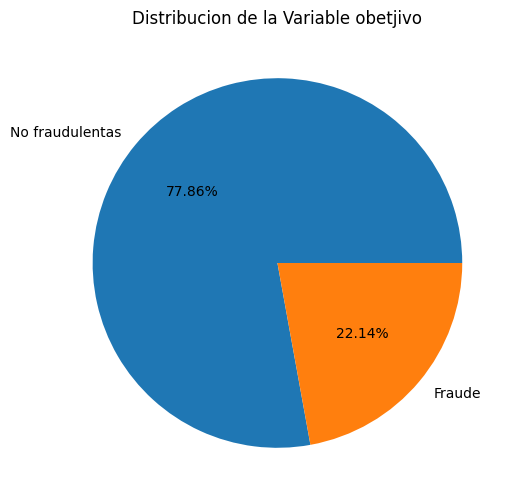

In [88]:
print(df['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[8,6])
labels = ['No fraudulentas', 'Fraude']
#colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['FLAG'].value_counts(),labels=labels, autopct='%.2f%%')
plt.title('Distribucion de la Variable obetjivo')
plt.show()

#### Matriz de correlacion

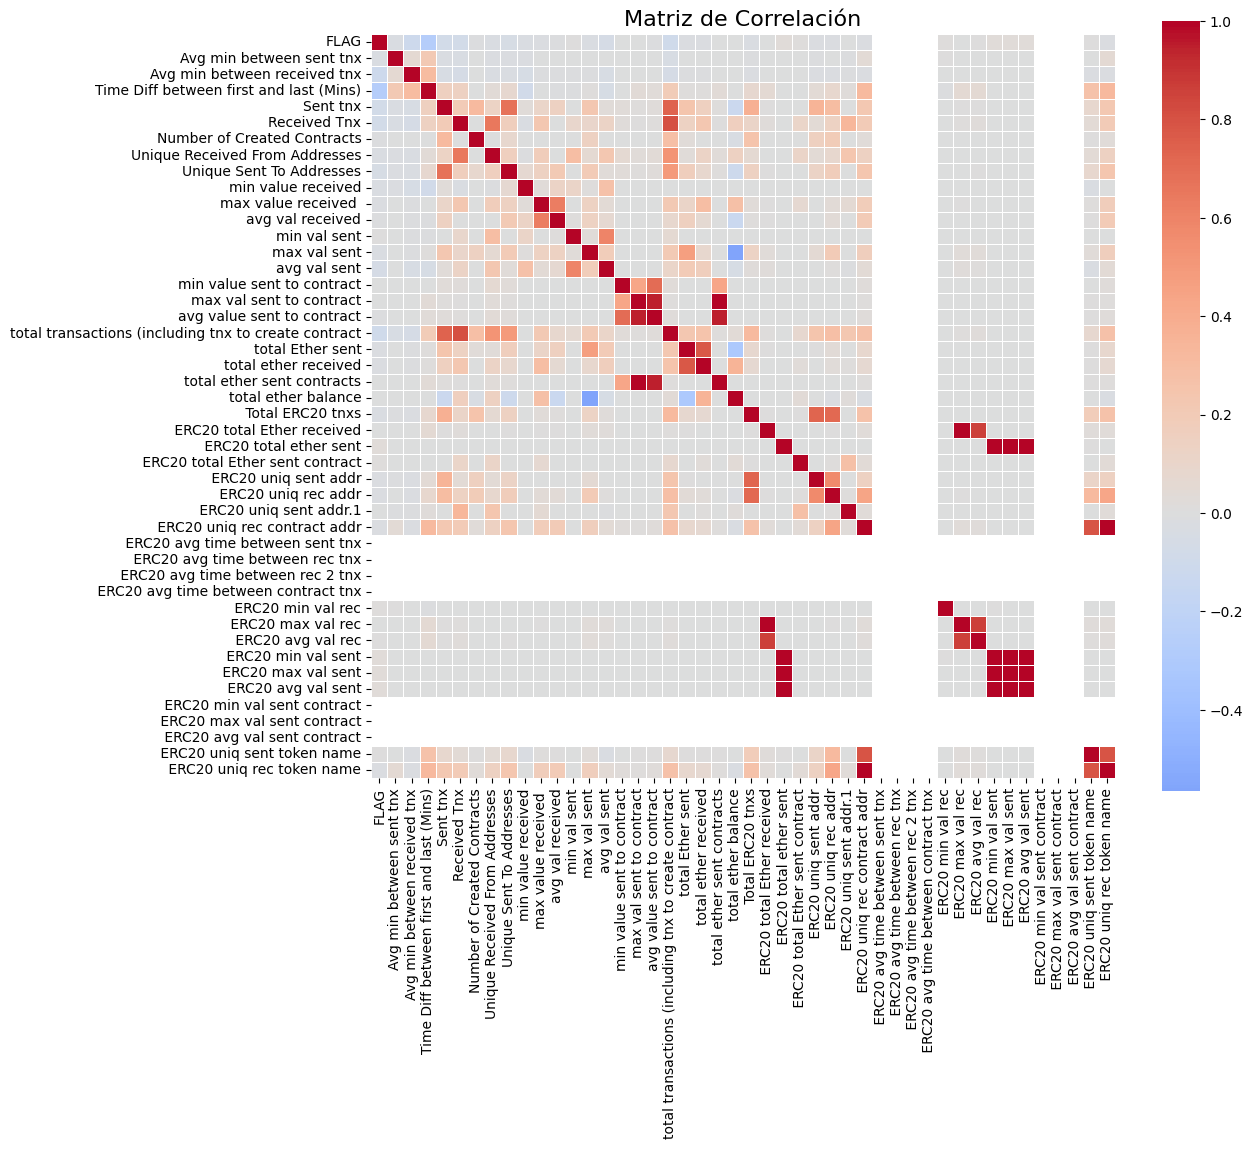

In [89]:
# Convertir columnas categóricas a variables dummy
df_with_dummies = pd.get_dummies(df, drop_first=True)

# Seleccionar solo las columnas numéricas nuevamente
numeric_df_with_dummies = df_with_dummies.select_dtypes(include=['float64', 'int64'])

# Calcular y visualizar la matriz de correlación
correlation_matrix = numeric_df_with_dummies.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, fmt=".2f", square=True, center=0)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

### Limpieza de datos

#### Datos faltantes

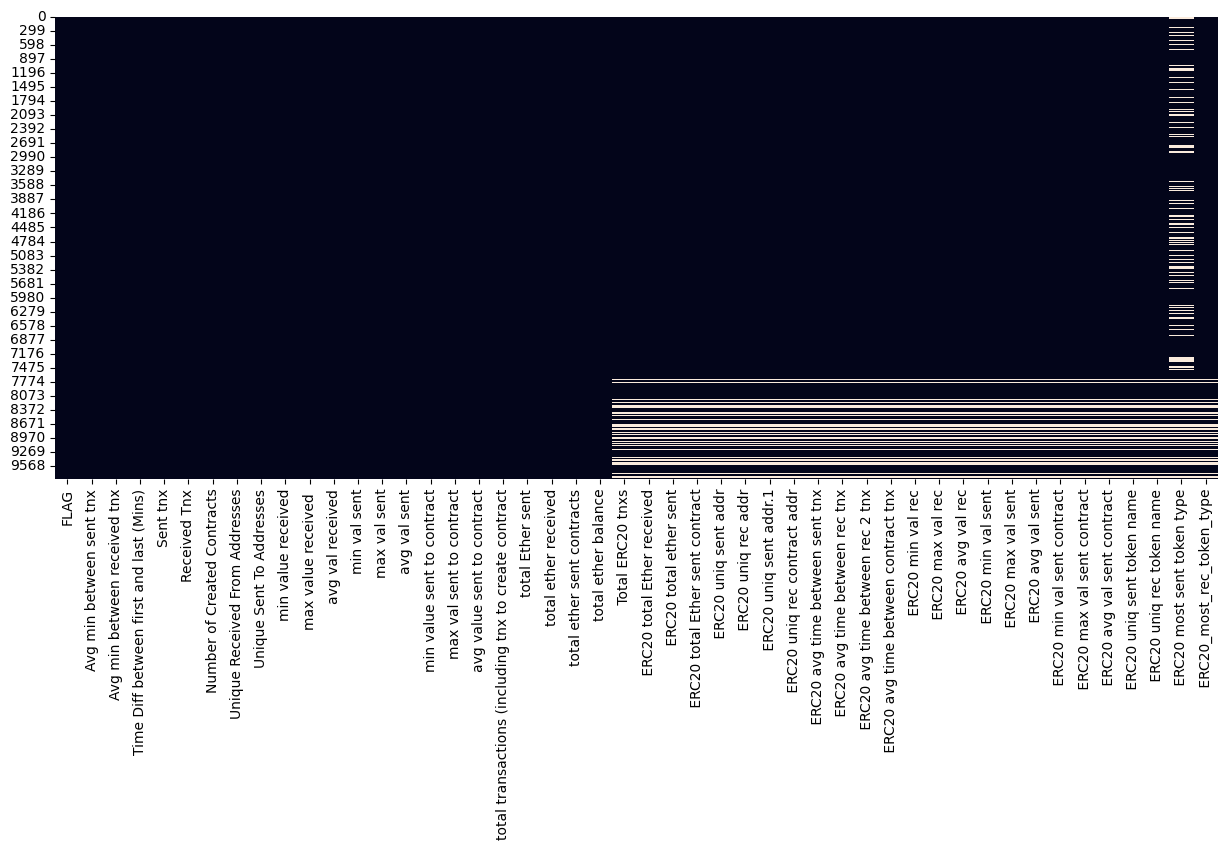

In [90]:
# Visualize missings pattern of the dataframe
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [91]:
# Dropeamos las 2 variables categoricas
df.drop(df[categories], axis=1, inplace=True)

In [92]:
# Reemplazamos datos numericos faltantes con la mediana
df.fillna(df.median(), inplace=True)

(9841, 46)


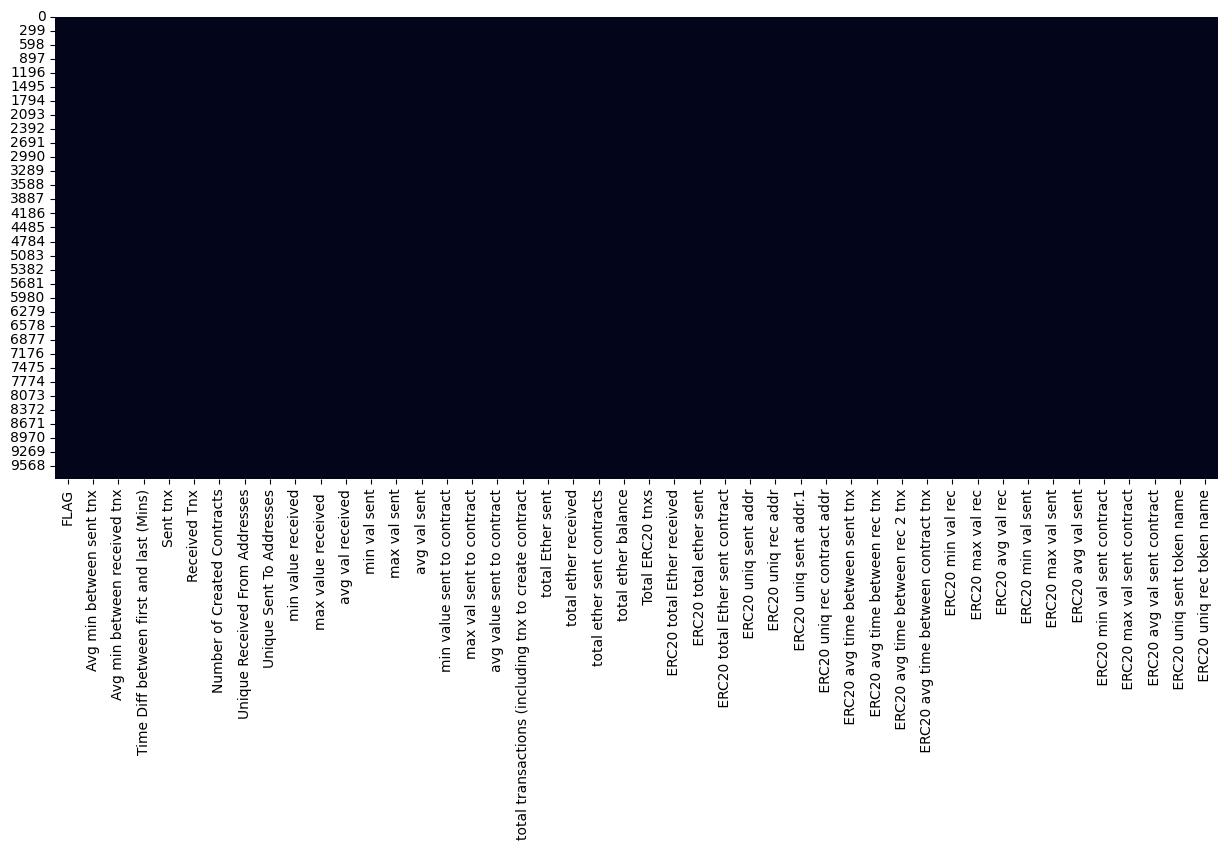

In [93]:
# Volvemos a visualizar los valores faltantes
print(df.shape)
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

#### Varianza = 0

In [94]:
# variables con varianza = 0 
no_var = df.var() == 0
print(df.var()[no_var])
print('\n')

ERC20 avg time between sent tnx        0.0
ERC20 avg time between rec tnx         0.0
ERC20 avg time between rec 2 tnx       0.0
ERC20 avg time between contract tnx    0.0
ERC20 min val sent contract            0.0
ERC20 max val sent contract            0.0
ERC20 avg val sent contract            0.0
dtype: float64




Estas características no ayudarán en el rendimiento del modelo

In [95]:
# Dropeamos las variables con var = 0
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.var())
print(df.shape)

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

#### Correlacion entre variables

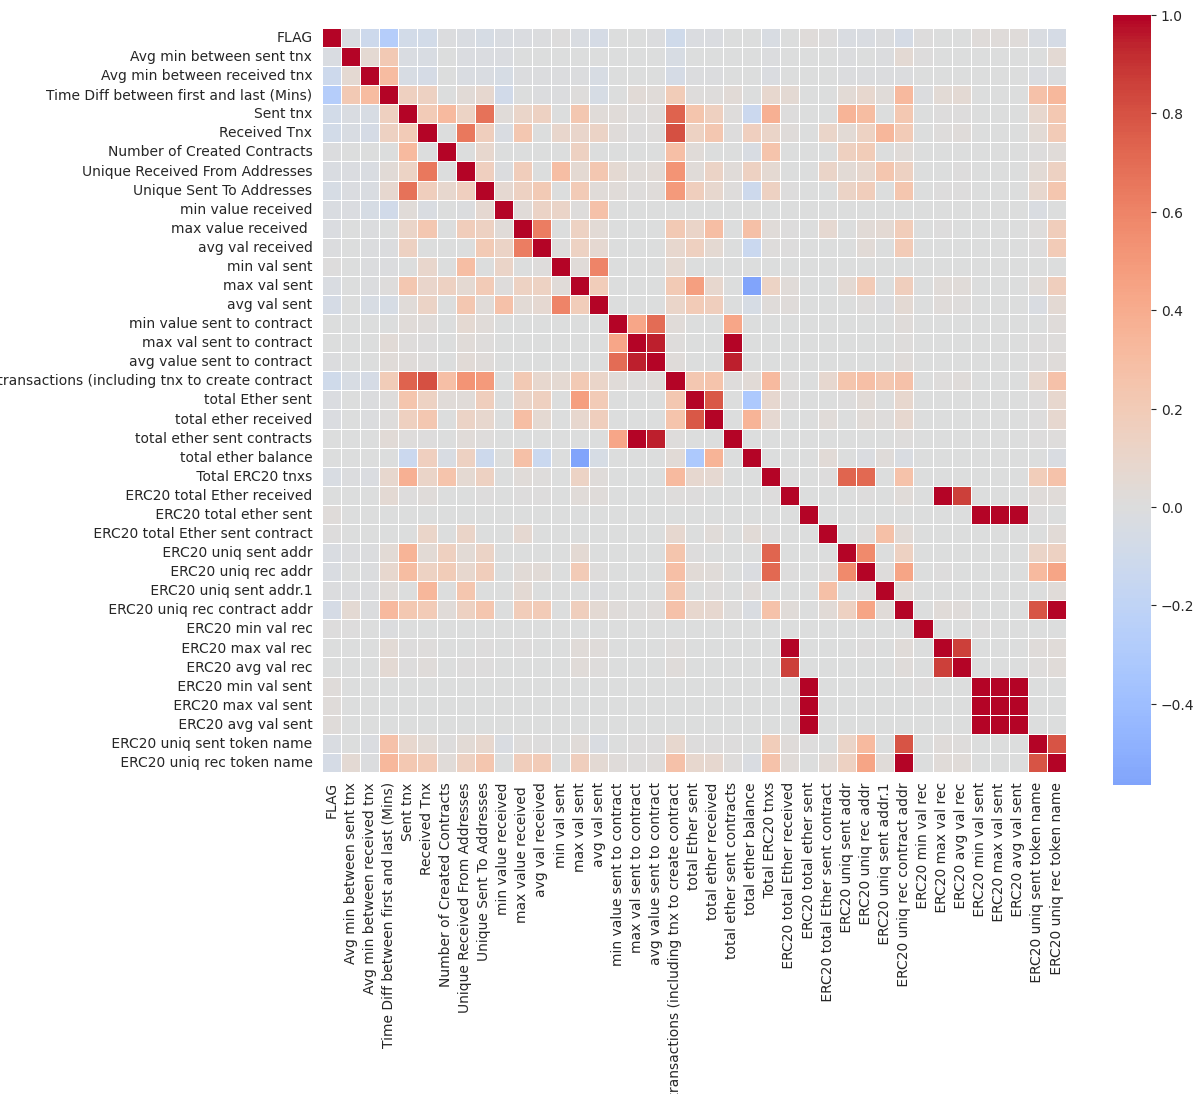

In [96]:
# volvemos a ver la matriz de correlacion
corr = df.corr()

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(12,10))
    #sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)
    sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5, fmt=".2f", square=True, center=0)


dropeamos las variables que estan muy correlacionadas entre si:

In [97]:
drop = ['total transactions (including tnx to create contract', 'total ether sent contracts', 'max val sent to contract', ' ERC20 avg val rec',
        ' ERC20 avg val rec',' ERC20 max val rec', ' ERC20 min val rec', ' ERC20 uniq rec contract addr', 'max val sent', ' ERC20 avg val sent',
        ' ERC20 min val sent', ' ERC20 max val sent', ' Total ERC20 tnxs', 'avg value sent to contract', 'Unique Sent To Addresses',
        'Unique Received From Addresses', 'total ether received', ' ERC20 uniq sent token name', 'min value received', 'min val sent', ' ERC20 uniq rec addr' ]
df.drop(drop, axis=1, inplace=True)
df.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'max value received ',
       'avg val received', 'avg val sent', 'min value sent to contract',
       'total Ether sent', 'total ether balance',
       ' ERC20 total Ether received', ' ERC20 total ether sent',
       ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec token name'],
      dtype='object')

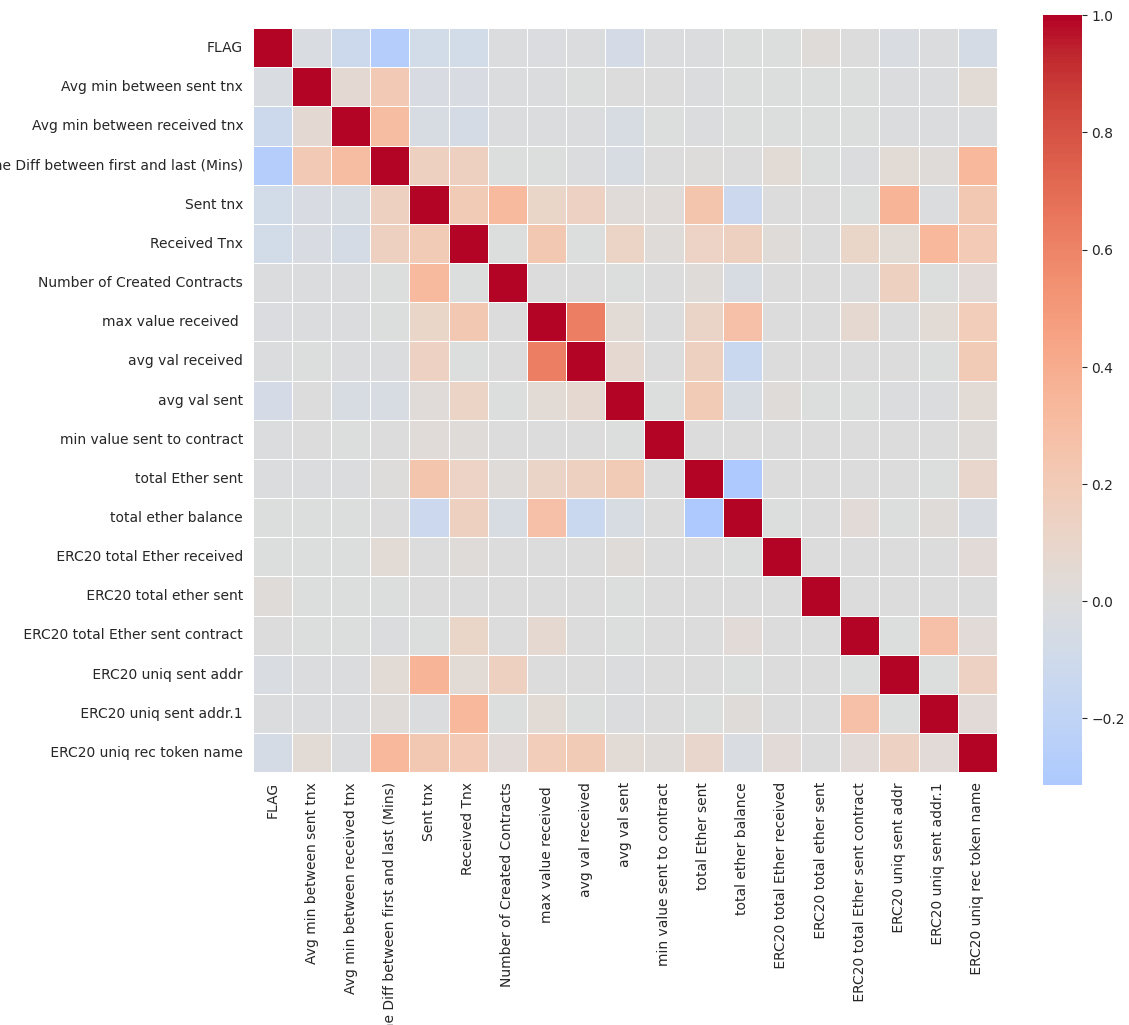

In [98]:
# volvemos a ver la matriz de correlacion
corr = df.corr()

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(12,10))
    #sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)
    sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5, fmt=".2f", square=True, center=0)


#### Distribucion de variables restantes

In [101]:
# variables finales:
columns = df.columns
columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'max value received ',
       'avg val received', 'avg val sent', 'min value sent to contract',
       'total Ether sent', 'total ether balance',
       ' ERC20 total Ether received', ' ERC20 total ether sent',
       ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec token name'],
      dtype='object')

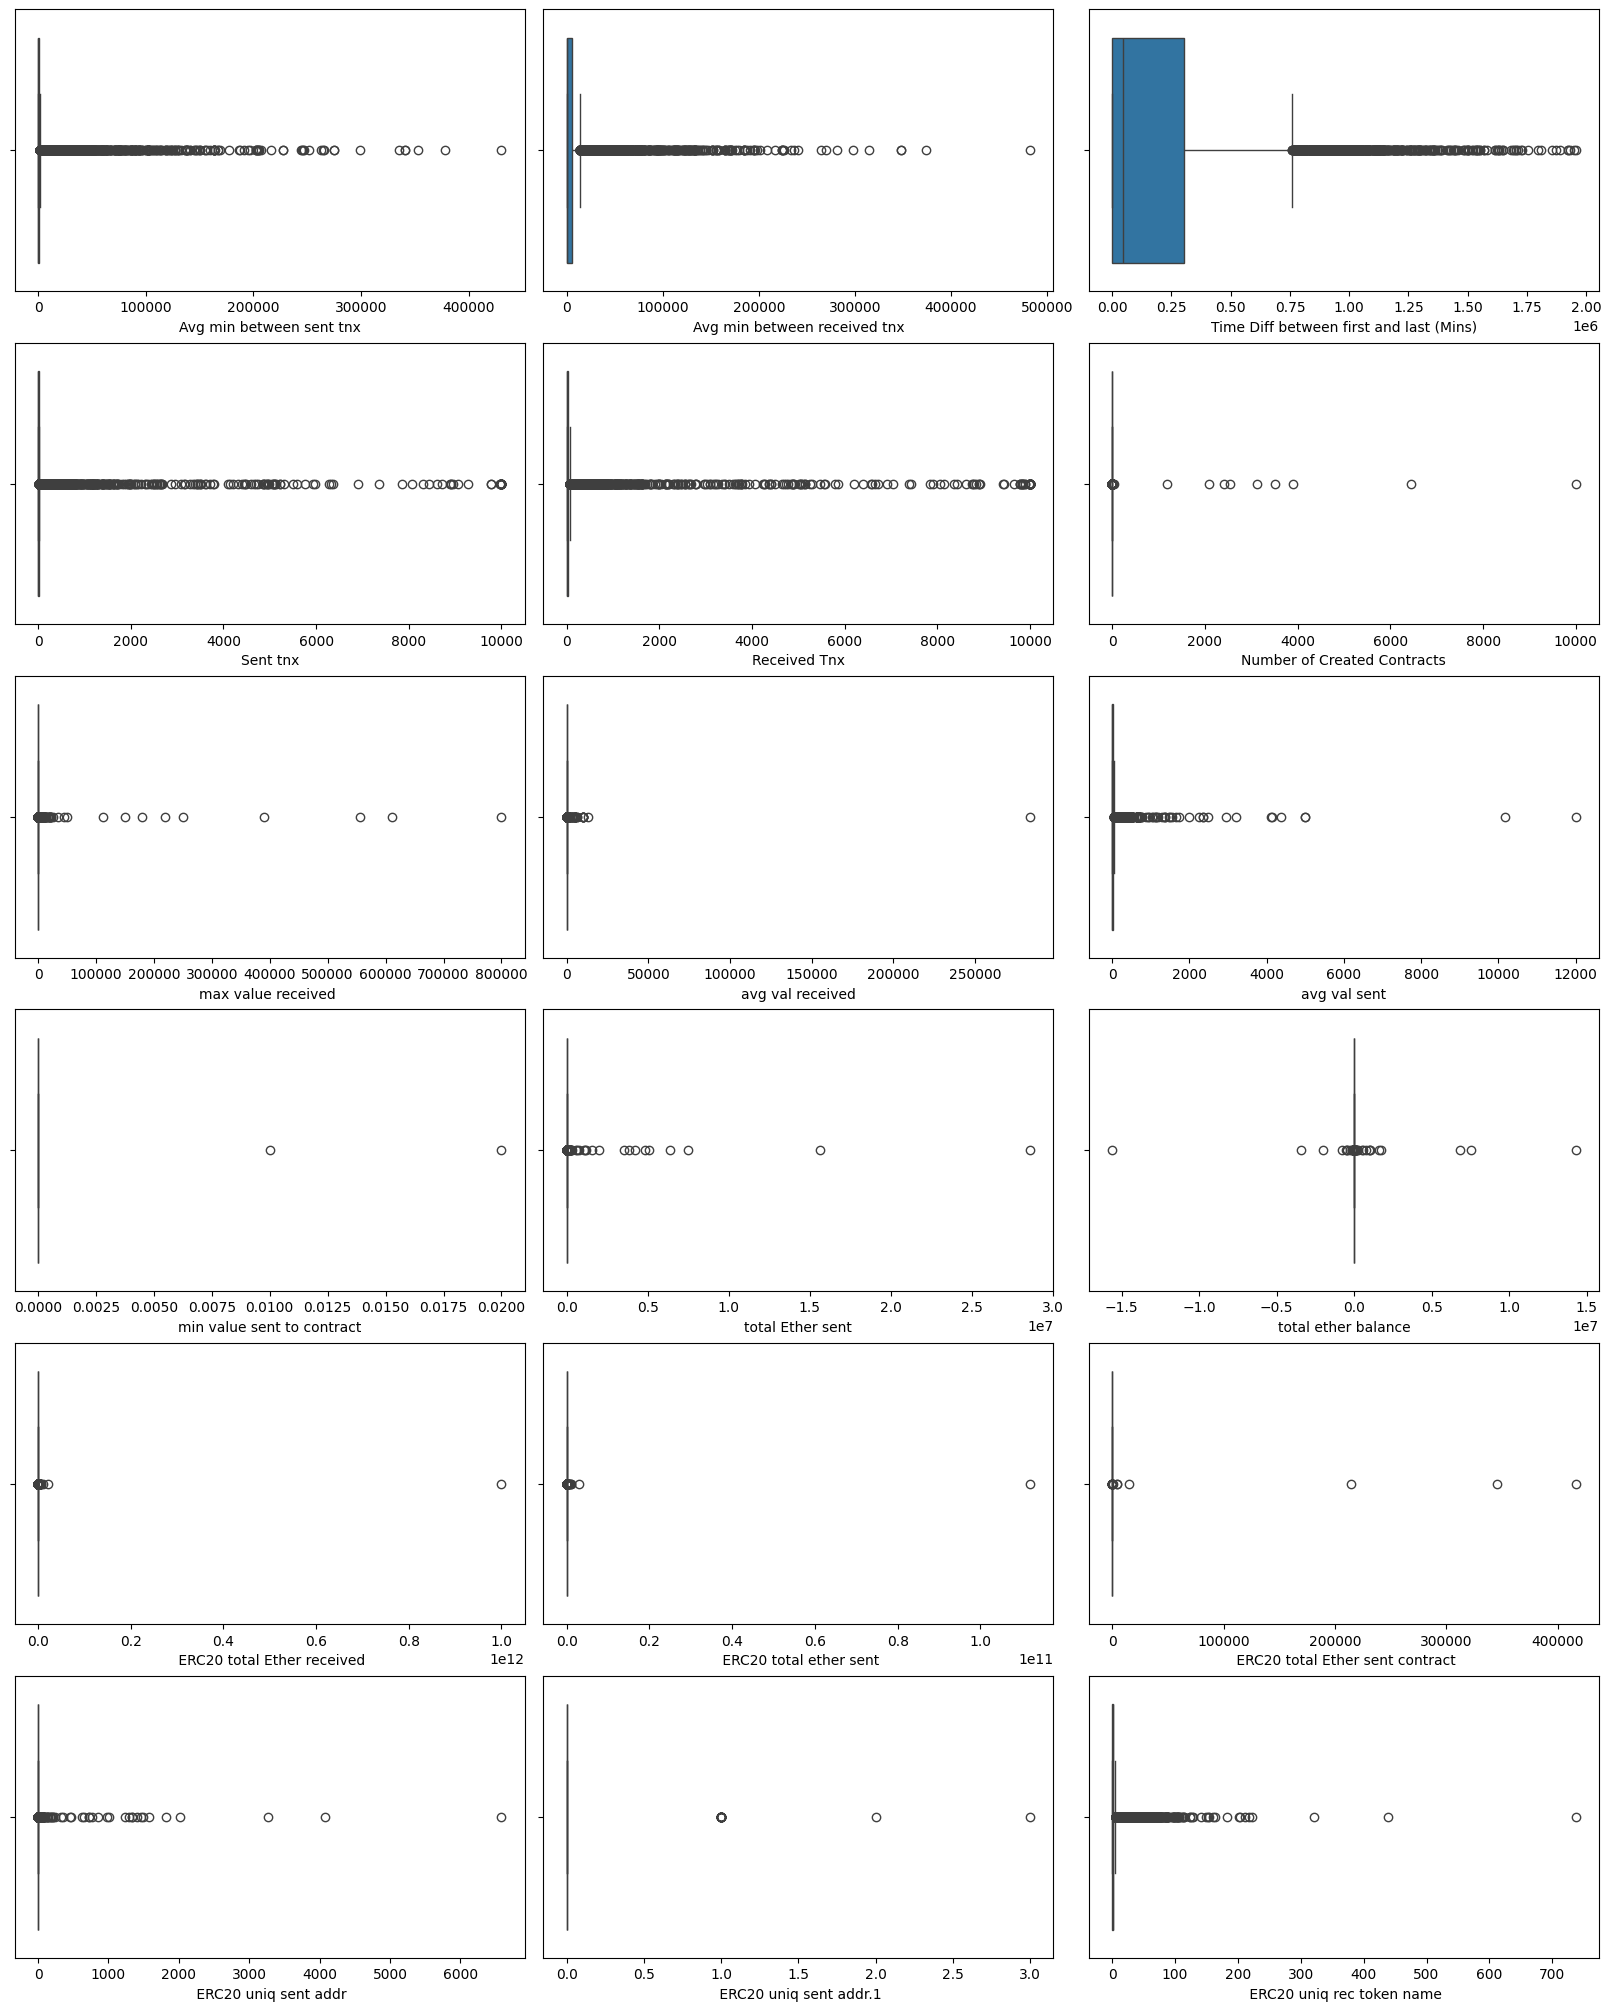

In [118]:
fig, axes = plt.subplots(6, 3, figsize=(16, 20), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=2)

ax = sns.boxplot(ax = axes[0,0], data=df, x=columns[1])
ax1 = sns.boxplot(ax = axes[0,1], data=df, x=columns[2])
ax2 = sns.boxplot(ax = axes[0,2], data=df, x=columns[3])
ax3 = sns.boxplot(ax = axes[1,0], data=df, x=columns[4])
ax4 = sns.boxplot(ax = axes[1,1], data=df, x=columns[5])
ax5 = sns.boxplot(ax = axes[1,2], data=df, x=columns[6])
ax6 = sns.boxplot(ax = axes[2,0], data=df, x=columns[7])
ax7 = sns.boxplot(ax = axes[2,1], data=df, x=columns[8])
ax8 = sns.boxplot(ax = axes[2,2], data=df, x=columns[9])
ax9 = sns.boxplot(ax = axes[3,0], data=df, x=columns[10])
ax10 = sns.boxplot(ax = axes[3,1], data=df, x=columns[11])
ax11 = sns.boxplot(ax = axes[3,2], data=df, x=columns[12])
ax12 = sns.boxplot(ax = axes[4,0], data=df, x=columns[13])
ax13 = sns.boxplot(ax = axes[4,1], data=df, x=columns[14])
ax14 = sns.boxplot(ax = axes[4,2], data=df, x=columns[15])
ax15 = sns.boxplot(ax = axes[5,0], data=df, x=columns[16])
ax16 = sns.boxplot(ax = axes[5,1], data=df, x=columns[17])
ax17 = sns.boxplot(ax = axes[5,2], data=df, x=columns[18])
plt.show()

In [121]:
# Variables con distribuciones pequenas
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'Distribucion de {i}:  \n{df[i].value_counts()}')
        print('--------------------------------------------------------')

Distribucion de min value sent to contract:  
min value sent to contract
0.00    9839
0.02       1
0.01       1
Name: count, dtype: int64
--------------------------------------------------------
Distribucion de  ERC20 uniq sent addr.1:  
 ERC20 uniq sent addr.1
0.0    9813
1.0      26
3.0       1
2.0       1
Name: count, dtype: int64
--------------------------------------------------------


Se puede observar que los valores de estas dos variables en su mayoría son 0. por lo tanto, ambas variables serán descartadas ya que no serán útiles para nuestro modelo

In [122]:
drops = ['min value sent to contract', ' ERC20 uniq sent addr.1']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(9841, 17)


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,45.806785,6.589513,1.200681,865.691093,-279.224419,3.558854e+07,3.560317e+07,0.0,30.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,2.613269,0.385685,0.032844,3.087297,-0.001819,4.034283e+02,2.260809e+00,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,1.165453,0.358906,1.794308,3.588616,0.000441,5.215121e+02,0.000000e+00,0.0,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,500.000000,99.488840,70.001834,1750.045862,-854.646303,1.711105e+04,1.141223e+04,0.0,2.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,12.802411,2.671095,0.022688,104.318883,-50.896986,1.628297e+05,1.235399e+05,0.0,4.0,27.0


## Preparacion de los datos

In [128]:
y = df.iloc[:, 0] # variable objetivo a predecir
X = df.iloc[:, 1:] # variables predictoras
print("X:", X.shape, "\ny:", y.shape)

X: (9841, 16) 
y: (9841,)


In [130]:
# train y test split (80, 20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 666)
print("X_train:", X_train.shape, "\ny_train:",y_train.shape)
print("X_test:", X_test.shape, "\ny_test:", y_test.shape)

X_train: (7872, 16) 
y_train: (7872,)
X_test: (1969, 16) 
y_test: (1969,)


#### Normalizacion

In [132]:
norm = PowerTransformer()
norm_train_f = norm.fit_transform(X_train)

In [133]:
norm_df = pd.DataFrame(norm_train_f, columns=X_train.columns)
norm_df

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,-1.098362,-1.180122,-1.636972,-1.391535,-1.784446,-0.402604,-1.399091,-1.275325,-1.131648,-1.244257,-0.007148,-0.742358,-0.406252,-0.037421,-0.432068,0.235920
1,-1.098362,0.995731,0.588180,-1.391535,0.600046,2.483708,0.766258,0.847762,-1.131648,-1.244257,-0.006259,-0.742358,-0.406252,-0.037421,-0.432068,-0.991948
2,0.055605,-1.180122,-1.160854,0.038133,-0.999103,-0.402604,1.097323,1.446629,1.209193,0.791664,-0.007148,-0.742358,-0.406252,-0.037421,-0.432068,-0.991948
3,1.342128,0.433528,1.053864,1.506251,0.630062,-0.402604,0.049769,-0.540027,-0.477909,0.685250,-0.007359,1.754996,2.530393,-0.037421,2.417875,1.538489
4,-1.098362,0.643816,0.768595,-1.391535,1.345826,2.483708,-1.122742,-1.071357,-1.131648,-1.244257,-0.007073,-0.202641,-0.406252,-0.037421,-0.432068,0.708753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,-1.098362,1.294629,0.287463,-1.391535,-0.611048,2.483708,0.520051,0.709644,-1.131648,-1.244257,-0.007066,-0.742358,-0.406252,-0.037421,-0.432068,-0.991948
7868,-1.098362,-1.180122,-1.636972,-1.391535,-1.784446,-0.402604,-1.399091,-1.275325,-1.131648,-1.244257,-0.007148,-0.742358,-0.406252,-0.037421,-0.432068,0.235920
7869,1.408298,0.502400,0.600756,0.874752,0.494093,-0.402604,1.283320,1.266308,1.306751,1.313188,-0.007148,1.838631,2.530835,-0.037421,2.346354,1.643084
7870,-0.544641,-1.180122,-1.405601,0.038133,-0.611048,-0.402604,1.716349,1.798433,1.826996,1.574253,-0.007148,-0.742358,-0.406252,-0.037421,-0.432068,-0.991948


### Class Imbalance

SE USARA OVERSAMPLING DE SMOTE POR SU FACILIDAD

In [150]:
y.value_counts(normalize=True) * 100 

# PORCENTAJE DE LA VARIABLE OBJETIVO

FLAG
0    77.857941
1    22.142059
Name: proportion, dtype: float64

In [134]:
oversample = SMOTE()
x_tr_resample, y_tr_resample = oversample.fit_resample(norm_train_f, y_train)

print(f'antes DE SMOTE: {norm_train_f.shape, y_train.shape}')
print(f'despues de SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

antes DE SMOTE: ((7872, 16), (7872,))
despues de SMOTE: ((12208, 16), (12208,))


## Modelos

### Regresion Logistica

In [160]:
LR = LogisticRegression(random_state=333)
LR.fit(x_tr_resample, y_tr_resample)

# Transform test features
norm_test_f = norm.transform(X_test)

preds = LR.predict(norm_test_f)

In [161]:
print(y_test.shape)
y_test.value_counts()

(1969,)


FLAG
0    1558
1     411
Name: count, dtype: int64

#### Metricas

In [165]:
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1558
           1       0.67      0.86      0.75       411

    accuracy                           0.88      1969
   macro avg       0.82      0.88      0.84      1969
weighted avg       0.90      0.88      0.89      1969

[[1385  173]
 [  57  354]]


#### Matriz de confusion

<Figure size 800x600 with 0 Axes>

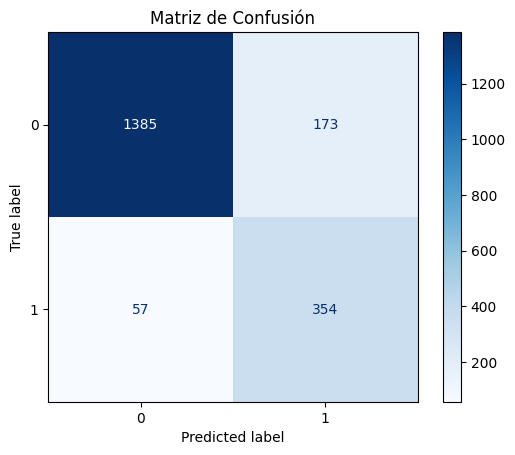

In [166]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, preds)

# Crear el objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Plotear la matriz de confusión
disp.plot(cmap='Blues', values_format='d')

# Añadir título
plt.title('Matriz de Confusión')

# Mostrar la gráfica
plt.show()

Considerando la matriz de confusión:

- El modelo LR identificó correctamente 354 (TP) casos de FRAUDE, de un total de 411 (P).
- El modelo LR marcó como FRAUDE 173 (FP) casos de 1558, cuando estos casos eran en realidad NO-FRAUDE.
- En un escenario de detección de fraudes, nos importa más las transacciones que eran realmente FRAUDES, pero que fueron clasificadas como NO-FRAUDE por nuestro modelo (FN - 57) -------> ERROR TIPO II.

Por lo tanto, vamos a intentar aumentar el recall

### Random Forest

In [167]:
RF = RandomForestClassifier(random_state=555)
RF.fit(x_tr_resample, y_tr_resample)
preds_RF = RF.predict(norm_test_f)

#### Metricas

In [168]:
print(classification_report(y_test, preds_RF))
print(confusion_matrix(y_test, preds_RF))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1558
           1       0.93      0.93      0.93       411

    accuracy                           0.97      1969
   macro avg       0.96      0.95      0.96      1969
weighted avg       0.97      0.97      0.97      1969

[[1531   27]
 [  30  381]]


#### Matriz de confusion

<Figure size 800x600 with 0 Axes>

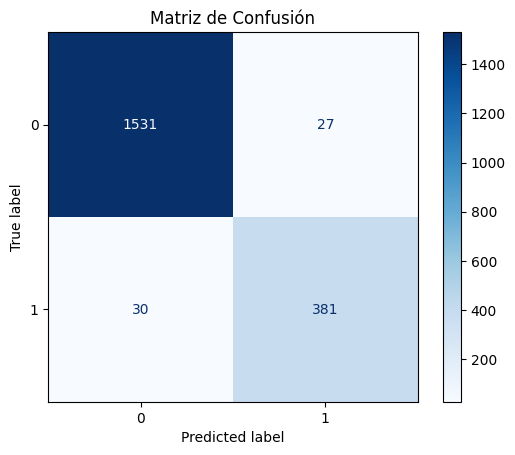

In [169]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, preds_RF)

# Crear el objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Plotear la matriz de confusión
disp.plot(cmap='Blues', values_format='d')

# Añadir título
plt.title('Matriz de Confusión')

# Mostrar la gráfica
plt.show()

El clasificador Random forest, parece producir resultados más efectivos.

- Tanto los FP como los FN se reducen considerablemente, aumentando el recall y la precisión.
- Usando Random forest, el modelo no detecta 30 casos de FRAUDE.

### XGBoost Classifier


In [170]:
xgb_c = xgb.XGBClassifier(random_state=888)
xgb_c.fit(x_tr_resample, y_tr_resample)
preds_xgb = xgb_c.predict(norm_test_f)

#### Metricas

In [171]:
print(classification_report(y_test, preds_xgb))
print(confusion_matrix(y_test, preds_xgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1558
           1       0.94      0.95      0.95       411

    accuracy                           0.98      1969
   macro avg       0.97      0.97      0.97      1969
weighted avg       0.98      0.98      0.98      1969

[[1535   23]
 [  21  390]]


#### Matriz de confusion

<Figure size 800x600 with 0 Axes>

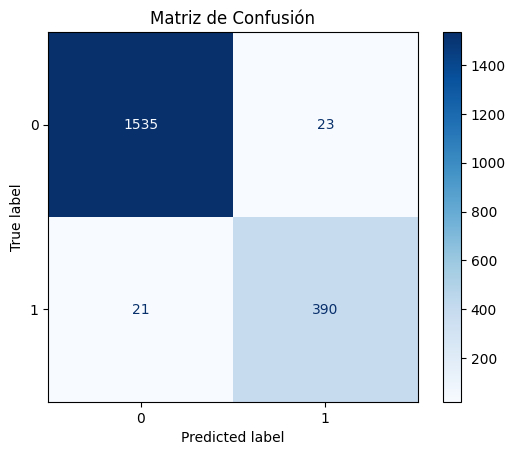

In [172]:
cm = confusion_matrix(y_test, preds_xgb)

# Crear el objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Plotear la matriz de confusión
disp.plot(cmap='Blues', values_format='d')

# Añadir título
plt.title('Matriz de Confusión')

# Mostrar la gráfica
plt.show()

Los resultados del XGBoost muestran que está obteniendo resultados ligeramente mejores que el Random Forest en lo que respecta a las transacciones NO-FRAUDE, marcando 23 casos como fraude cuando en realidad eran no-fraude.

En cuanto a la identificación de FRAUDES, el XGBoost dejó de detectar 21 transacciones de un total de 411, lo que sugiere el mejor puntaje de recall.

Considerando todo lo anterior, el mejor modelo es el XGBoost y es la opción que queremos tomar y mejorar si es posible

#### Parameter tunning

##### Grid search

In [173]:
params_grid = {'learning_rate':[0.01, 0.1, 0.5],
              'n_estimators':[100,200],
              'subsample':[0.3, 0.5, 0.9],
               'max_depth':[2,3,4],
               'colsample_bytree':[0.3,0.5,0.7]}

grid = GridSearchCV(estimator=xgb_c, param_grid=params_grid, scoring='recall', cv = 10, verbose = 0)

grid.fit(x_tr_resample, y_tr_resample)
print(f'Best params found for XGBoost are: {grid.best_params_}')
print(f'Best recall obtained by the best params: {grid.best_score_}')

Best params found for XGBoost are: {'colsample_bytree': 0.5, 'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.5}
Best recall obtained by the best params: 0.9900093906790802


##### Metricas

In [174]:
preds_best_xgb = grid.best_estimator_.predict(norm_test_f)
print(classification_report(y_test, preds_best_xgb))
print(confusion_matrix(y_test, preds_best_xgb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1558
           1       0.95      0.94      0.94       411

    accuracy                           0.98      1969
   macro avg       0.97      0.96      0.96      1969
weighted avg       0.98      0.98      0.98      1969

[[1536   22]
 [  24  387]]


##### Matriz de confusion

<Figure size 800x600 with 0 Axes>

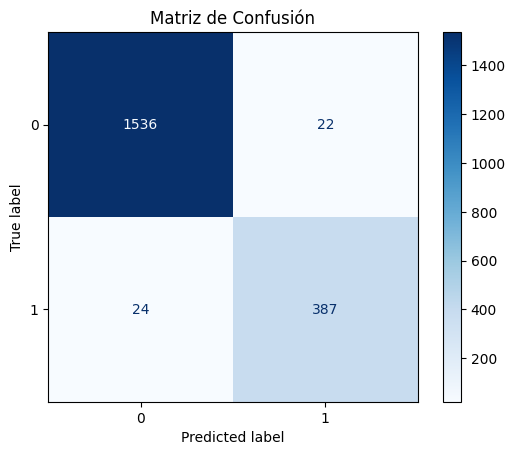

In [175]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, preds_best_xgb)

# Crear el objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Plotear la matriz de confusión
disp.plot(cmap='Blues', values_format='d')

# Añadir título
plt.title('Matriz de Confusión')

# Mostrar la gráfica
plt.show()

La matriz de confusión no muestra mejora; los resultados son muy similares a los obtenidos con el modelo sin ajustar los parametros con grid search

##### Curva AUC

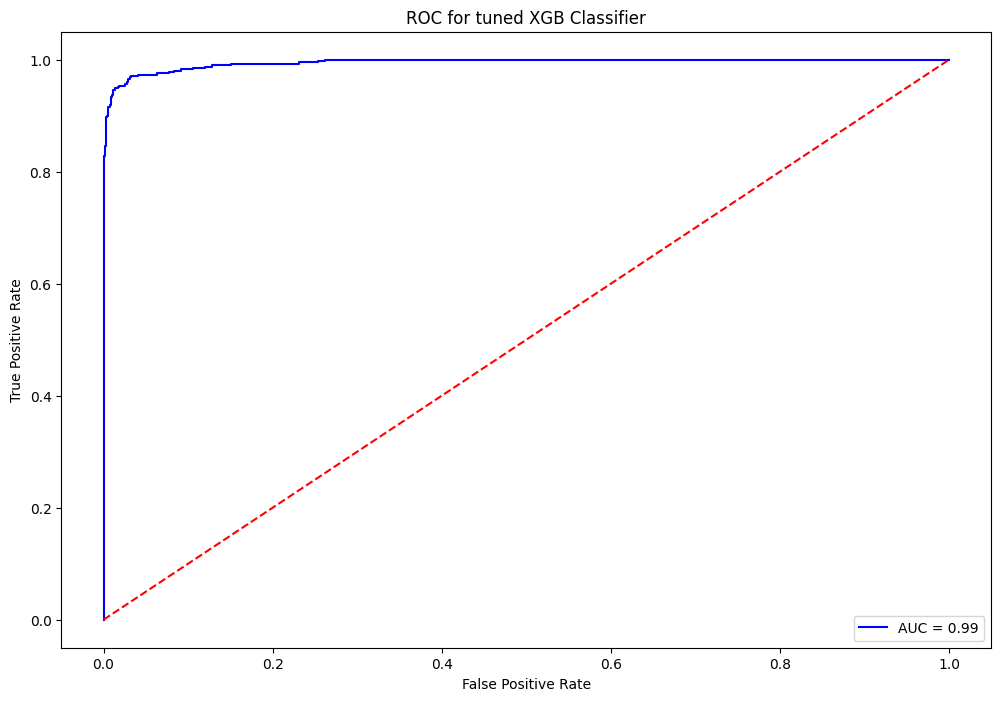

In [176]:
# Plotting AUC for untuned XGB Classifier
probs = xgb_c.predict_proba(norm_test_f)
pred = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8))
plt.title('ROC for tuned XGB Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Guardamos el modelo

In [177]:
# Save the model for further use
pickle_out = open('XGB_FRAUD_ETH.pickle', 'wb')
pickle.dump(xgb_c, pickle_out)
pickle_out.close()